In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
EARTH_RADIUS = 6371

In [3]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return EARTH_RADIUS * c

In [4]:
file_path = "iisc-mar1715.csv" 
columns = ["Time", "PRN", "Lat", "Lon", "Stec"]
data = pd.read_csv(file_path, usecols=columns)

In [5]:
data = data.replace(-99, np.nan).dropna()

In [6]:
data["Time_seconds"] = data["Time"] * 3600

In [7]:
data = data.sort_values(by=["PRN", "Time_seconds"])

In [8]:
data

,Time,PRN,Lat,Lon,Stec,Time_seconds
0,5.266667,1,18.606,71.445,92.33,18960.0012
1,5.275000,1,18.555,71.472,92.23,18990.0000
2,5.283333,1,18.506,71.498,92.11,19019.9988
3,5.291667,1,18.456,71.524,92.00,19050.0012
4,5.300000,1,18.407,71.549,91.86,19080.0000
...,...,...,...,...,...,...
24850,10.475000,32,2.055,81.249,123.39,37710.0000
24851,10.483333,32,1.967,81.295,123.39,37739.9988
24852,10.491667,32,1.878,81.342,123.39,37770.0012
24853,10.500000,32,1.789,81.390,123.39,37800.0000


In [9]:
gradients = []
for prn, group in data.groupby("PRN"):
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        t1, t2 = group.loc[i - 1, "Time_seconds"], group.loc[i, "Time_seconds"]
        dt = t2 - t1
        if dt <= 31 and dt >=29:
            lat1, lon1 = group.loc[i - 1, ["Lat", "Lon"]]
            lat2, lon2 = group.loc[i, ["Lat", "Lon"]]
            d_ipp = haversine(lat1, lon1, lat2, lon2)
            
            stec1, stec2 = group.loc[i - 1, "Stec"], group.loc[i, "Stec"]
            gradient = (stec2 - stec1) / d_ipp if d_ipp > 0 else np.nan
            
            row = group.loc[i].to_dict() 
            row["Gradient (mm/km)"] = gradient * 1000  
            gradients.append(row)


In [10]:

gradient_df = pd.DataFrame(gradients)

In [11]:
gradient_df.to_csv("gradients.csv", index=False)

In [12]:
gradient_df = pd.read_csv("gradients.csv")

In [16]:
gradient_df

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km)
0,5.275000,1.0,18.555,71.472,92.23,18990.0000,-15.760639
1,5.283333,1.0,18.506,71.498,92.11,19019.9988,-19.674570
2,5.291667,1.0,18.456,71.524,92.00,19050.0012,-17.744430
3,5.300000,1.0,18.407,71.549,91.86,19080.0000,-23.128046
4,5.308333,1.0,18.358,71.574,91.76,19109.9988,-16.519140
...,...,...,...,...,...,...,...
24700,10.475000,32.0,2.055,81.249,123.39,37710.0000,0.000000
24701,10.483333,32.0,1.967,81.295,123.39,37739.9988,0.000000
24702,10.491667,32.0,1.878,81.342,123.39,37770.0012,0.000000
24703,10.500000,32.0,1.789,81.390,123.39,37800.0000,0.000000


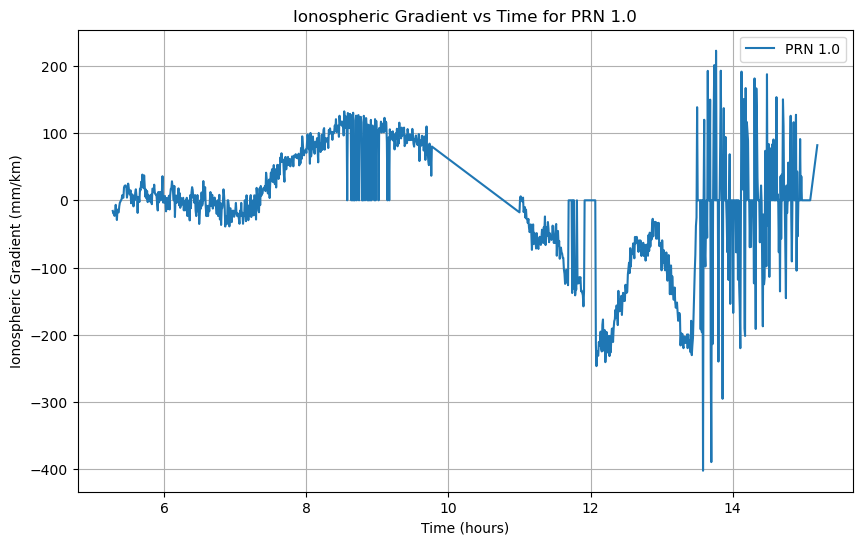

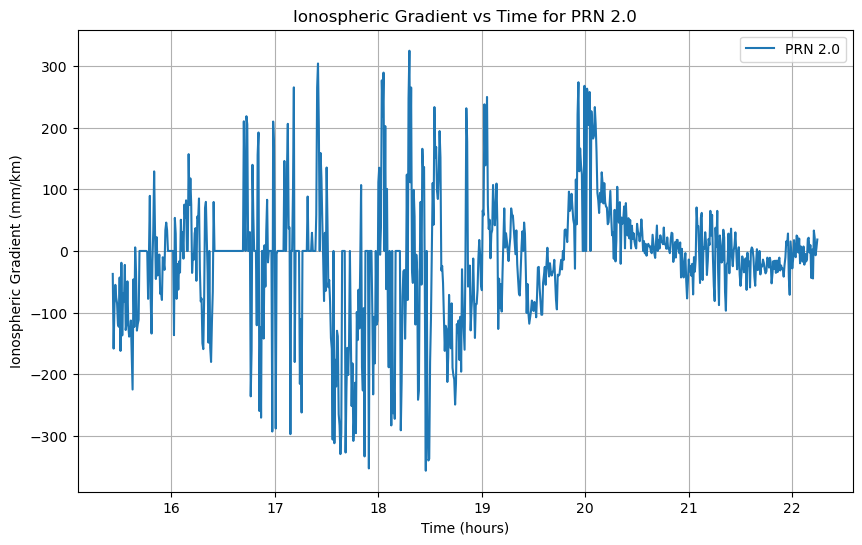

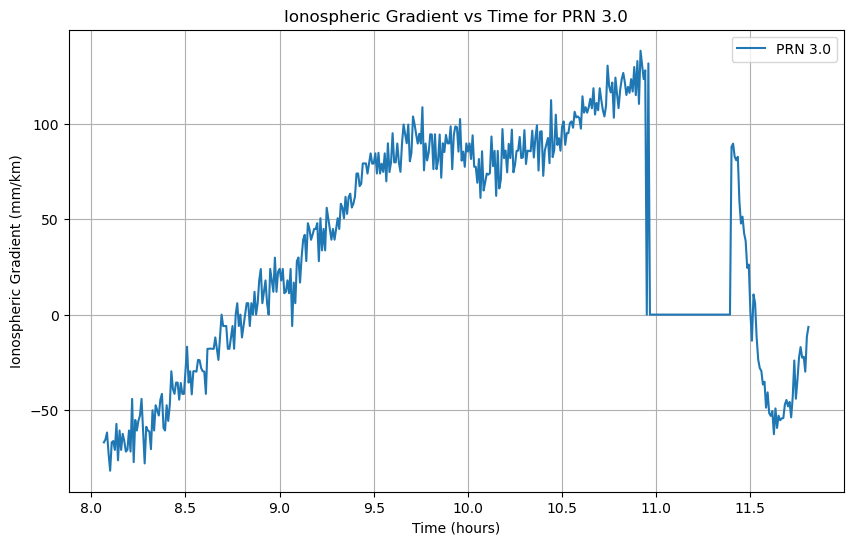

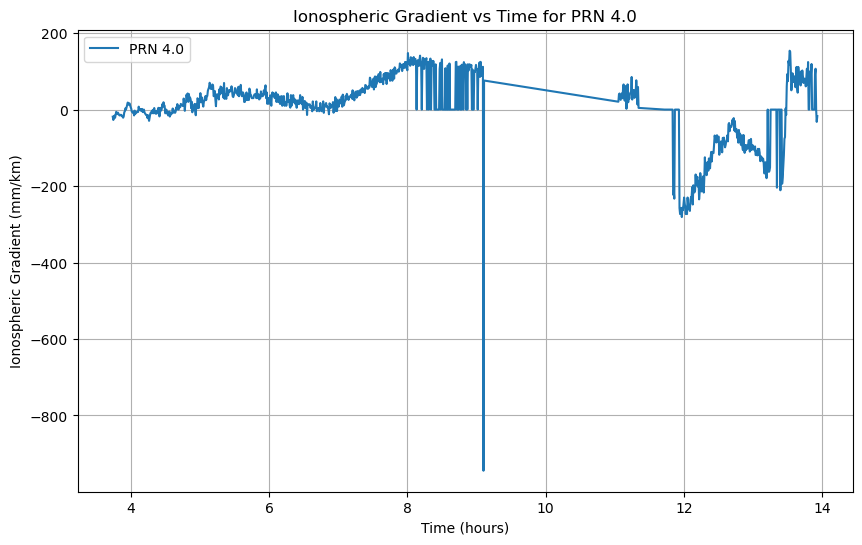

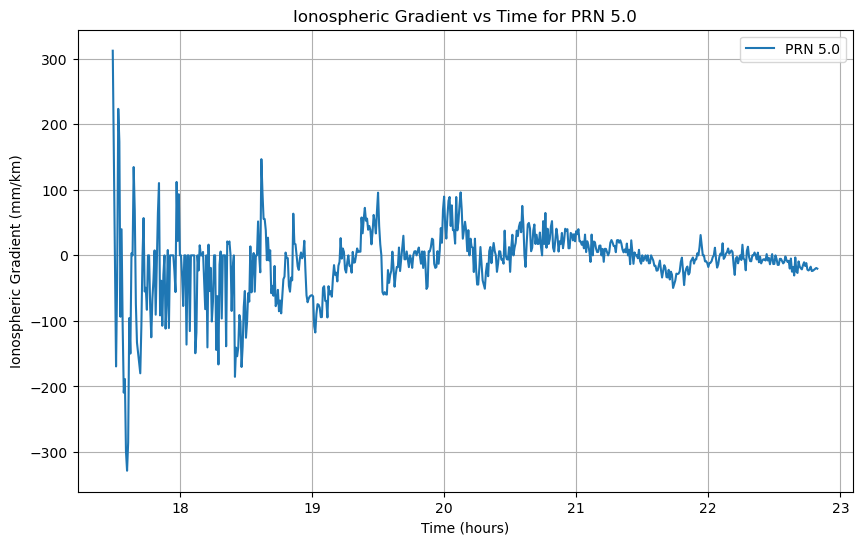

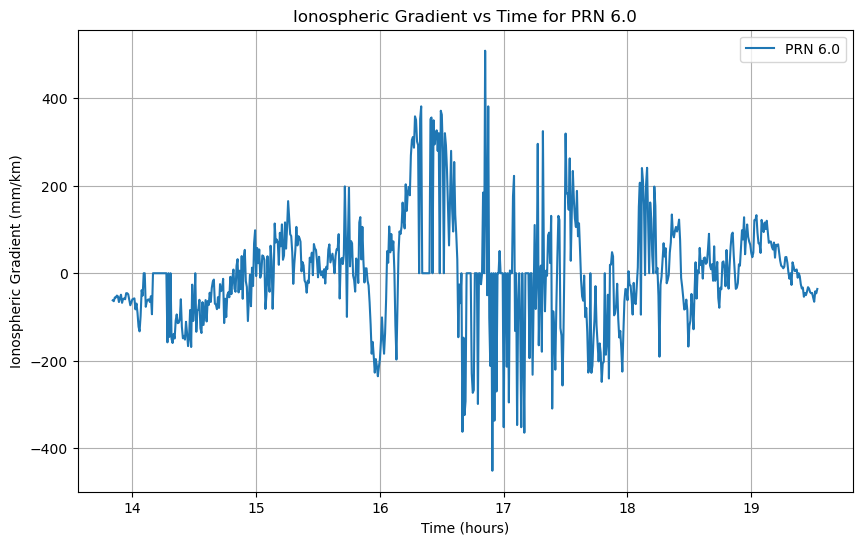

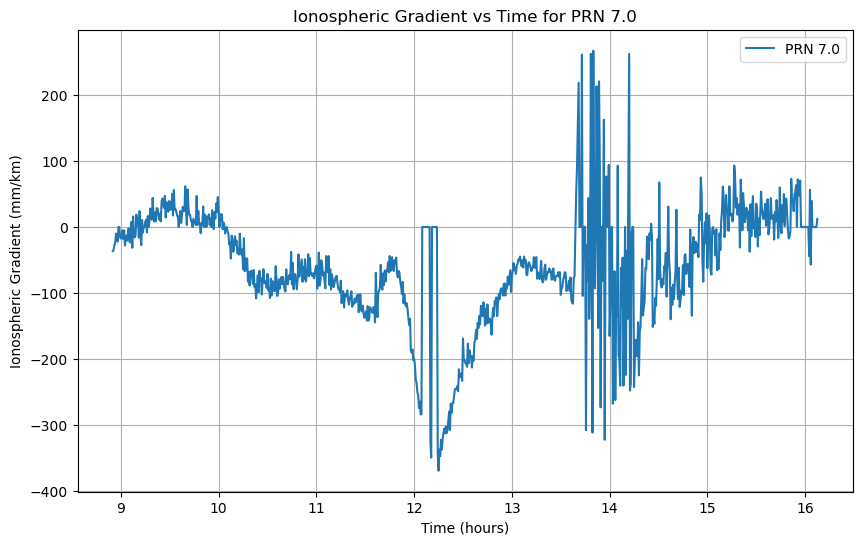

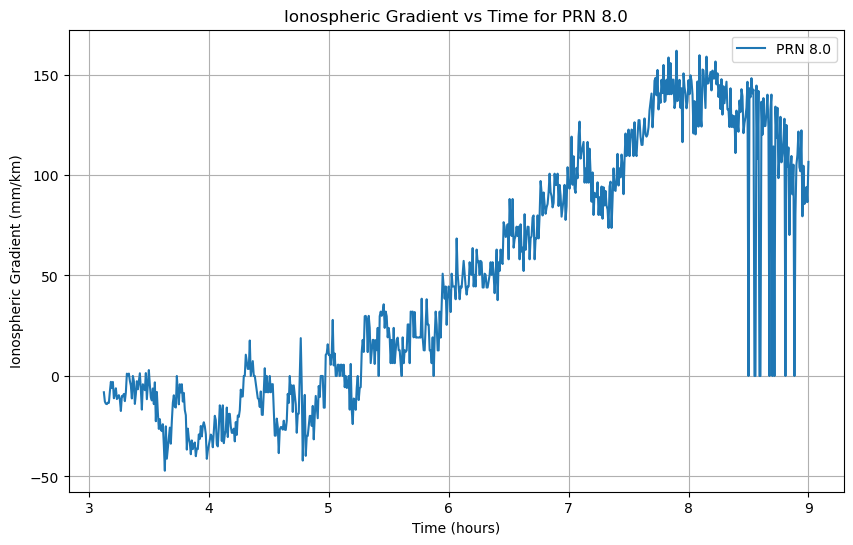

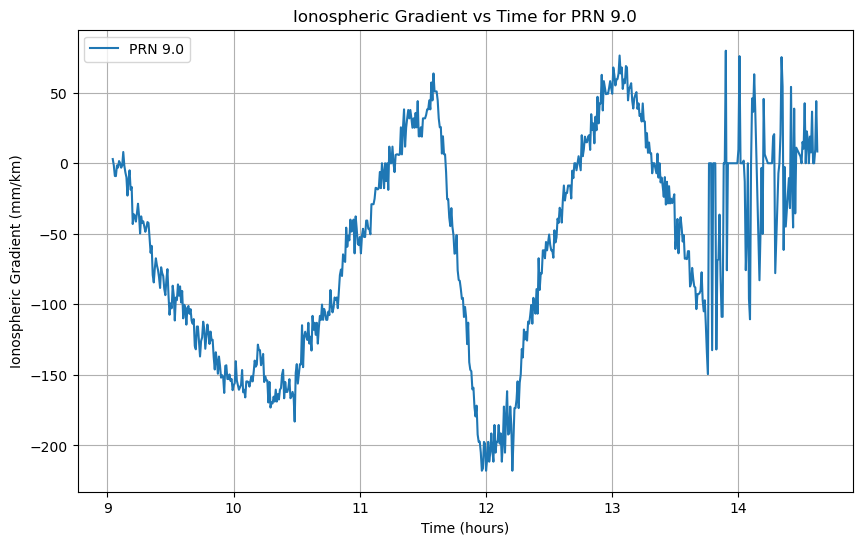

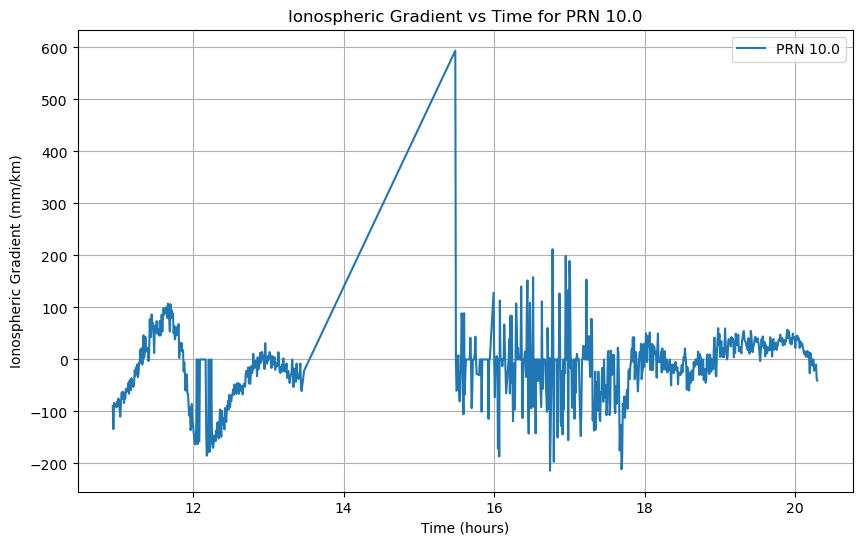

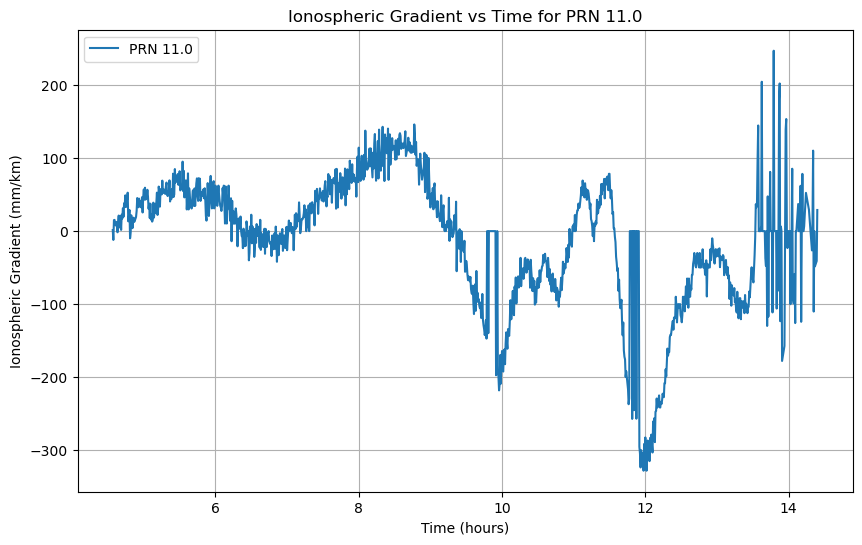

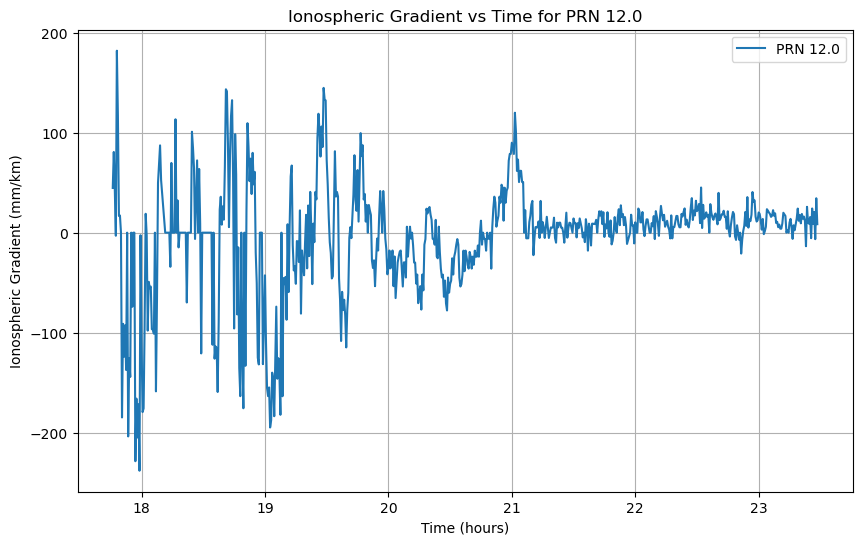

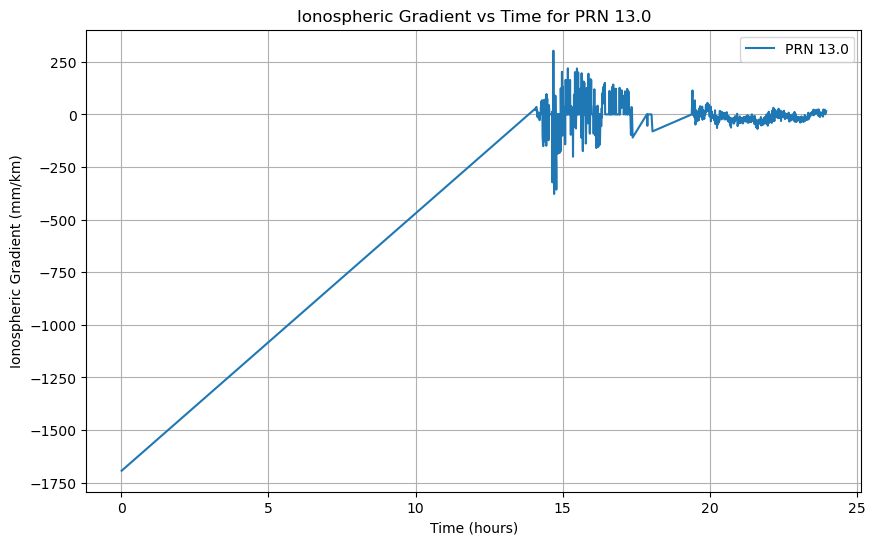

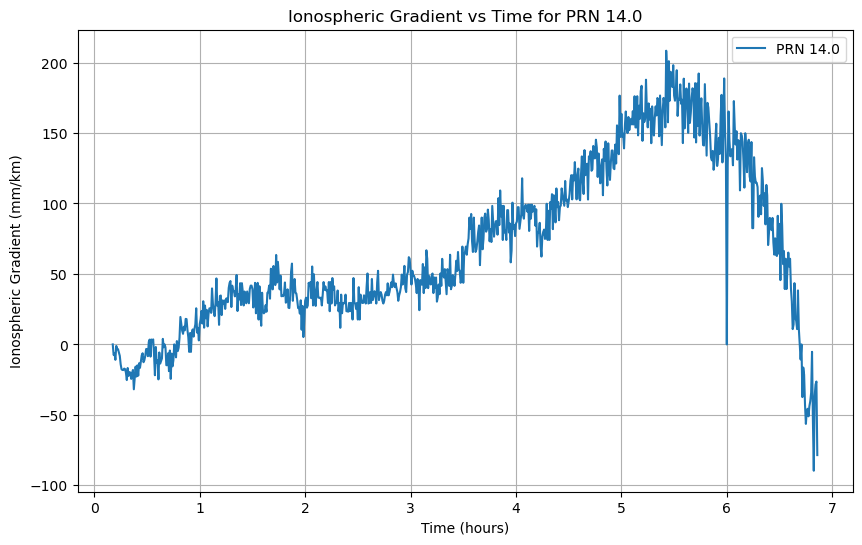

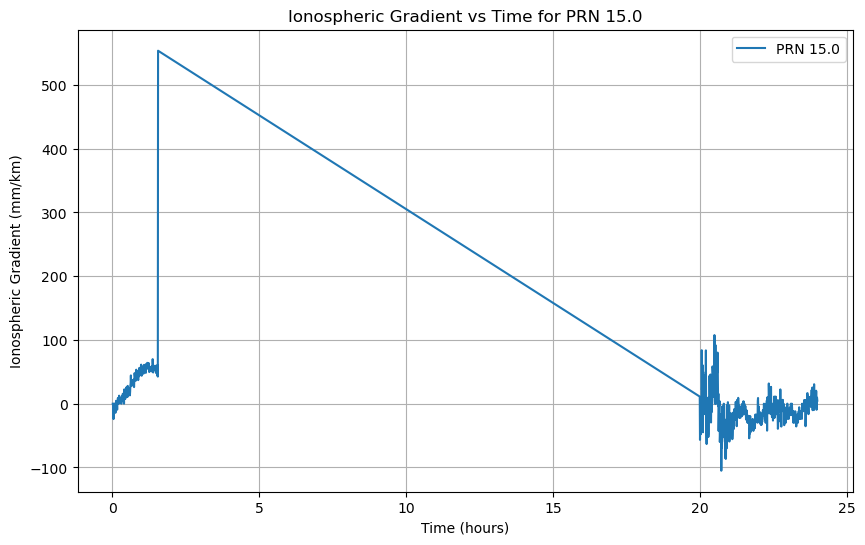

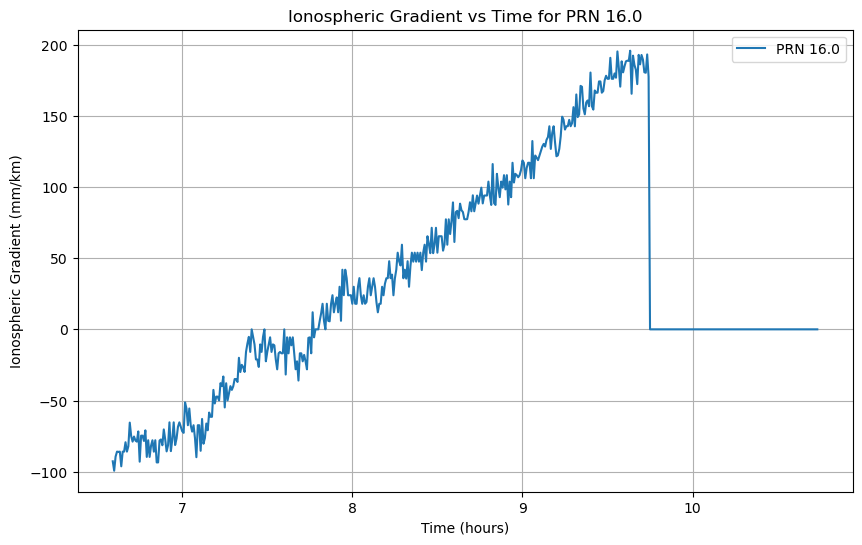

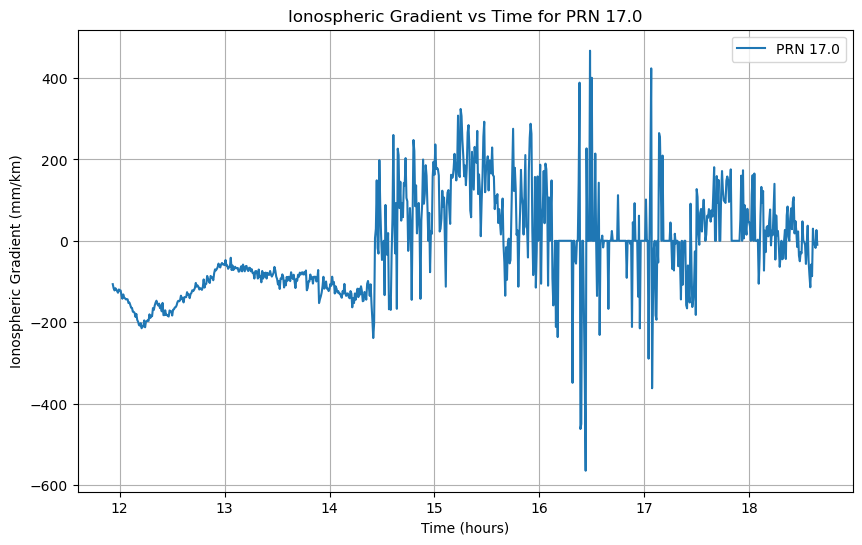

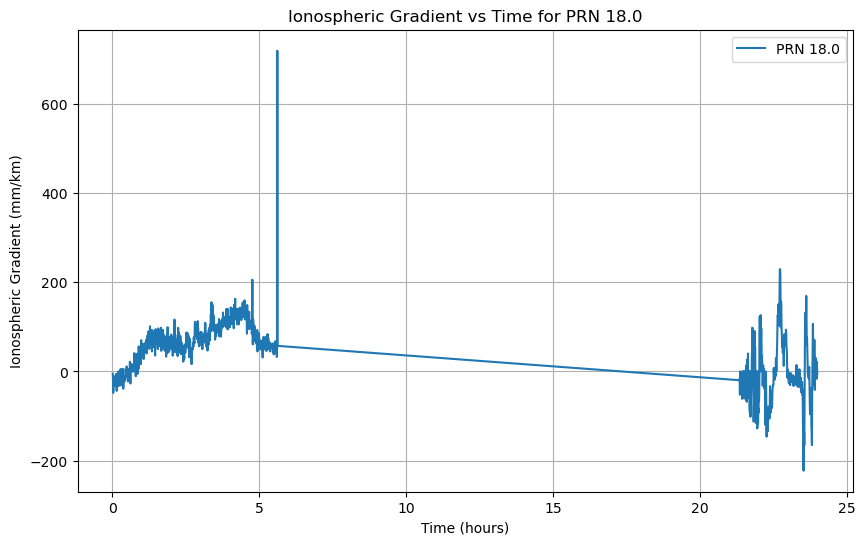

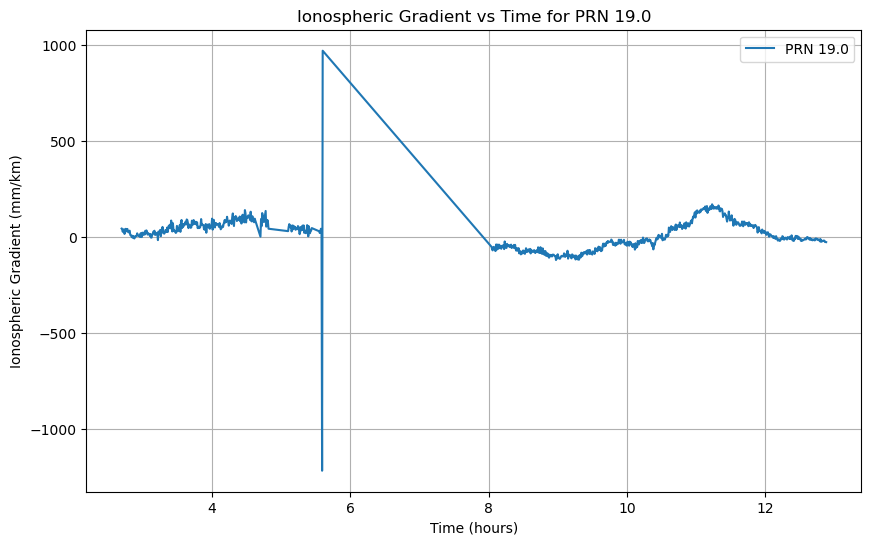

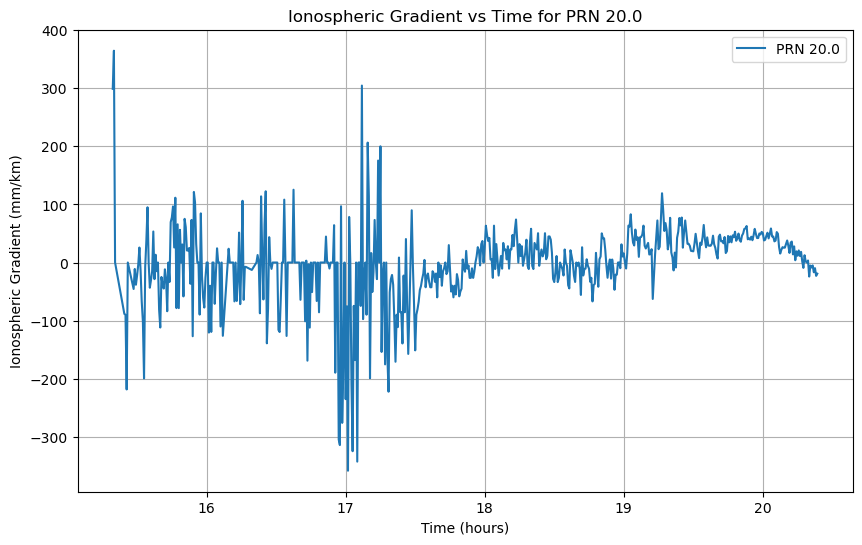

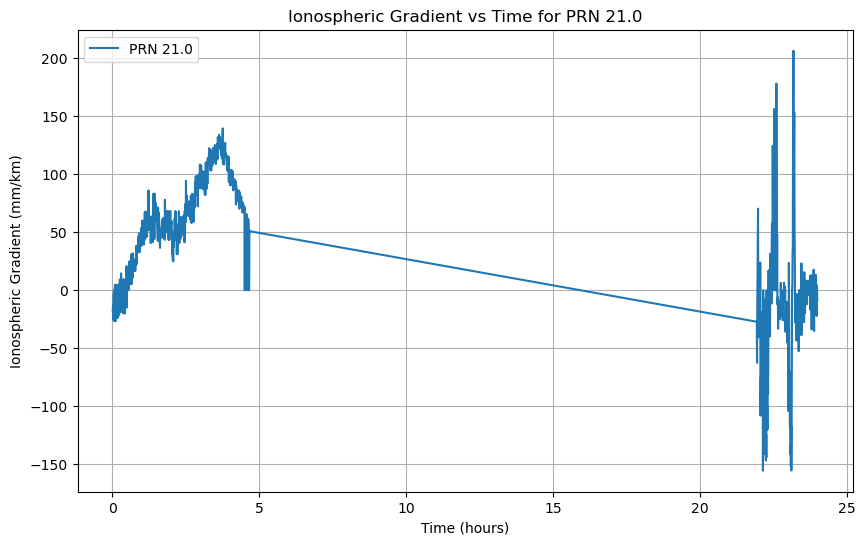

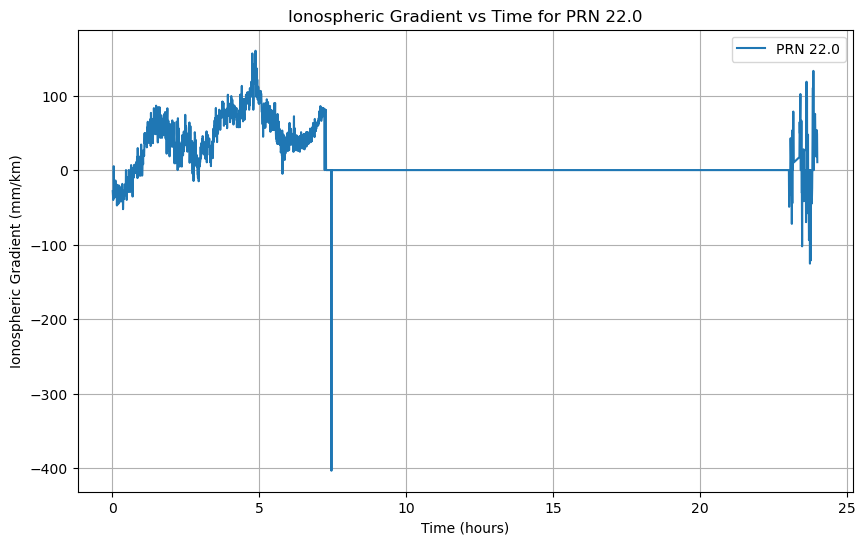

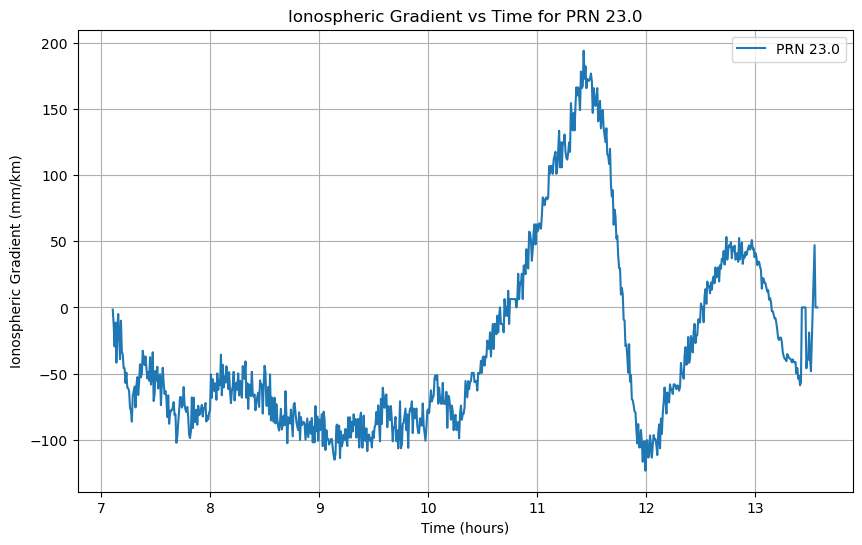

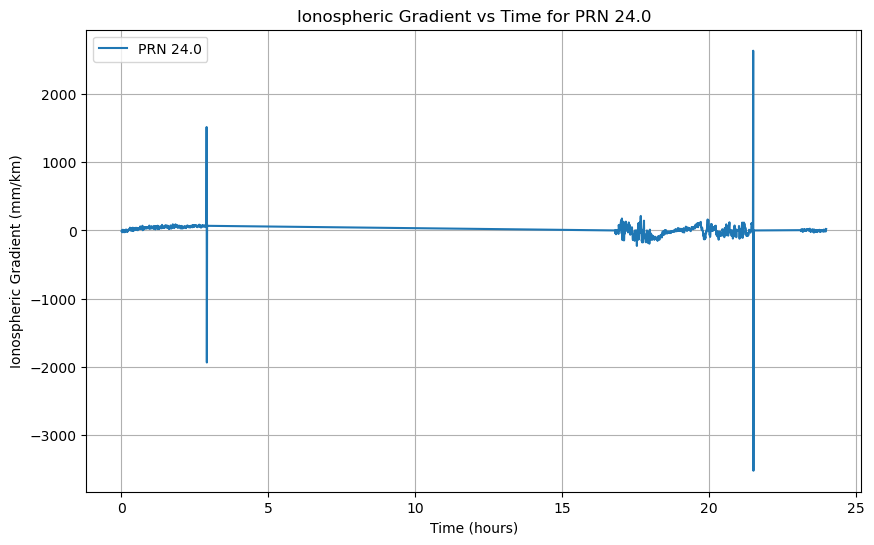

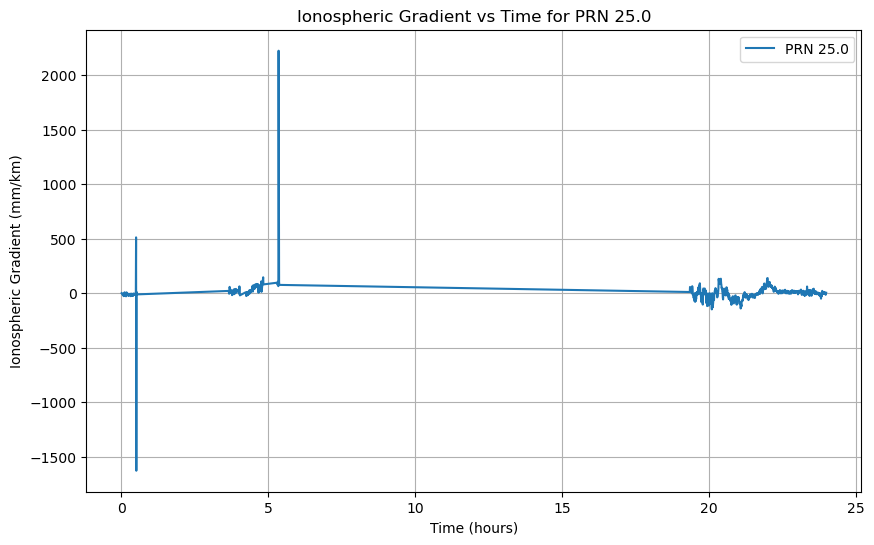

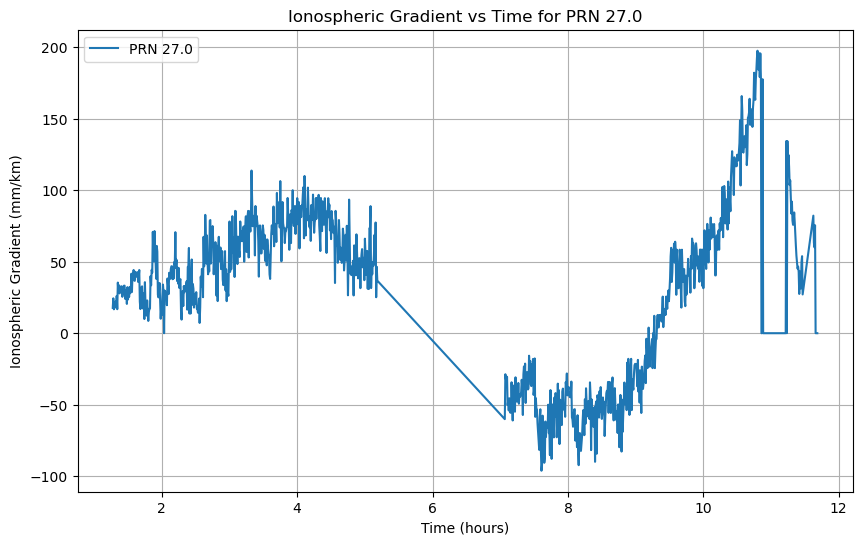

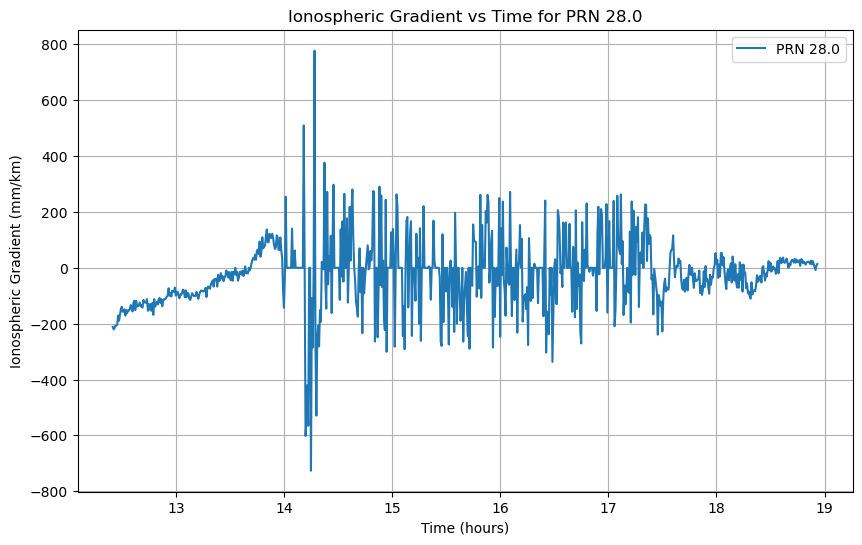

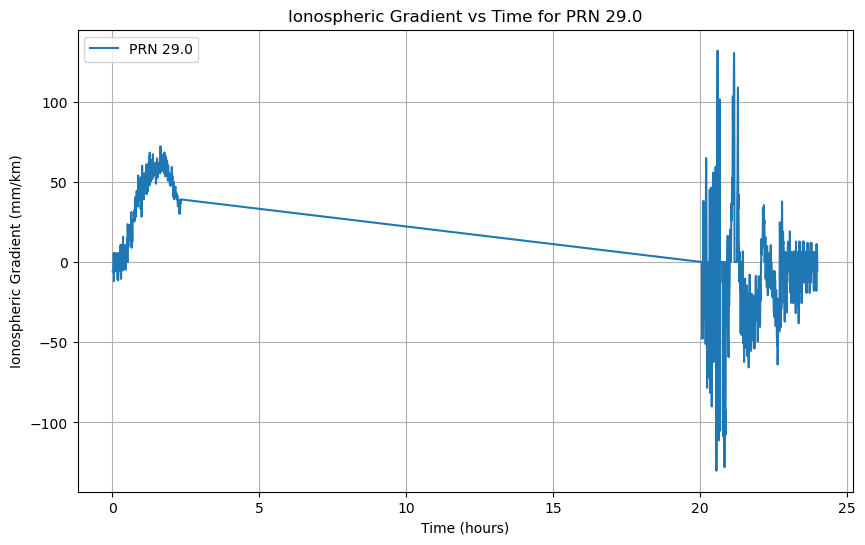

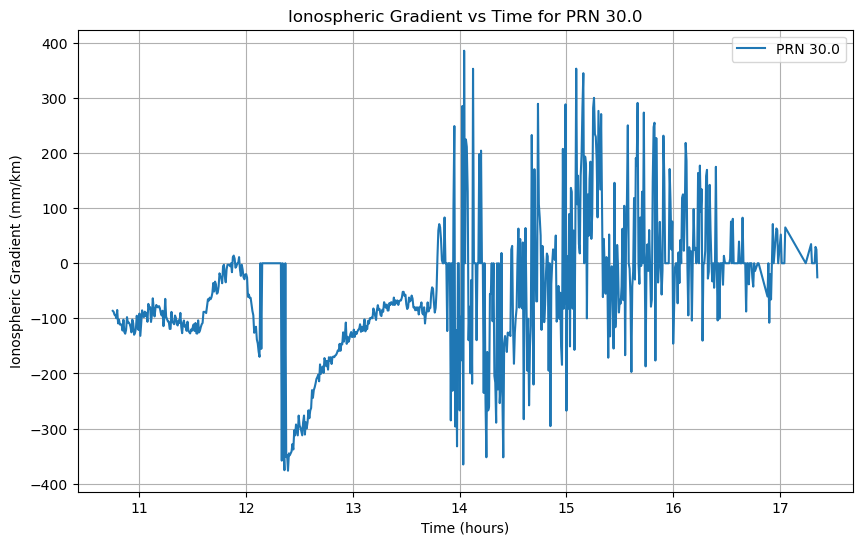

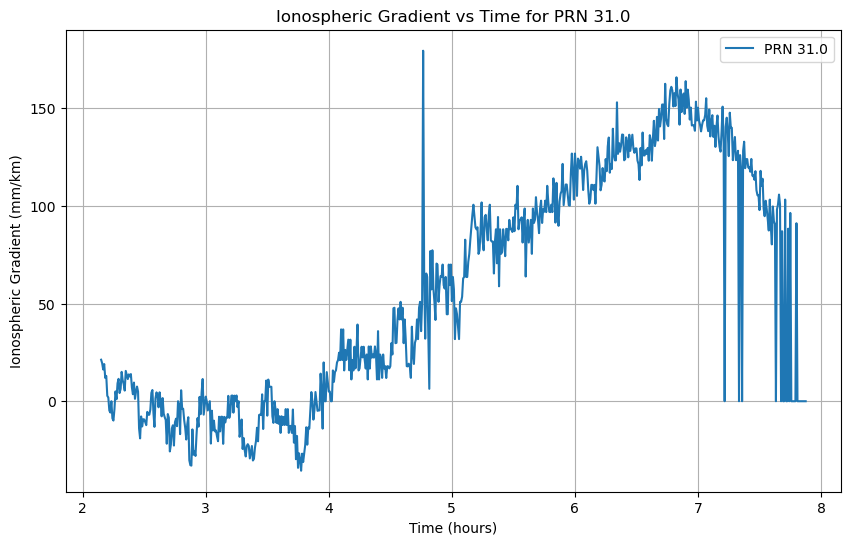

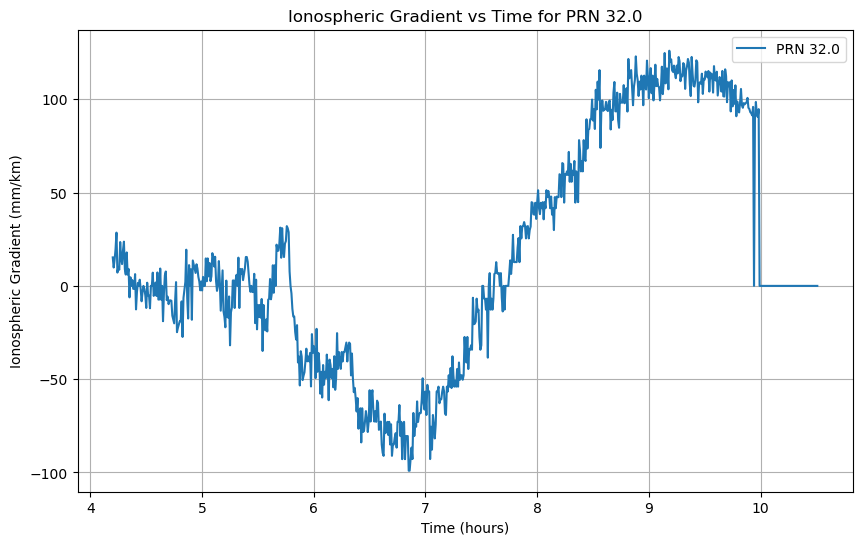

Plots saved for each PRN.


In [22]:


gradient_file = "gradients.csv"  
gradient_df = pd.read_csv(gradient_file)

unique_prns = gradient_df["PRN"].unique()

for prn in unique_prns:
    prn_data = gradient_df[gradient_df["PRN"] == prn]
    
    plt.figure(figsize=(10, 6))
    plt.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label=f"PRN {prn}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Ionospheric Gradient (mm/km)")
    plt.title(f"Ionospheric Gradient vs Time for PRN {prn}")
    plt.grid(True)
    plt.legend()
    plt.show()

print("Plots saved for each PRN.")


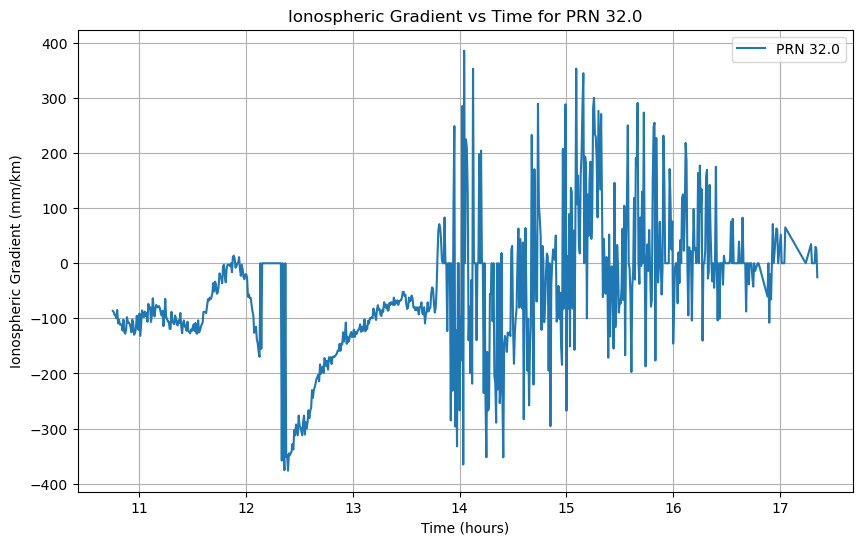

Plots saved for each PRN.


In [23]:

gradient_file = "gradients.csv" 
gradient_df = pd.read_csv(gradient_file)

unique_prns = gradient_df["PRN"].unique()

prn_data = gradient_df[gradient_df["PRN"] == 30]

plt.figure(figsize=(10, 6))
plt.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label=f"PRN {prn}")
plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title(f"Ionospheric Gradient vs Time for PRN {prn}")
plt.grid(True)
plt.legend()
plt.show()

print("Plots saved for each PRN.")


In [31]:
filtered_df = gradient_df[(gradient_df["Time"] >= 13) & (gradient_df["Time"] <= 17)]

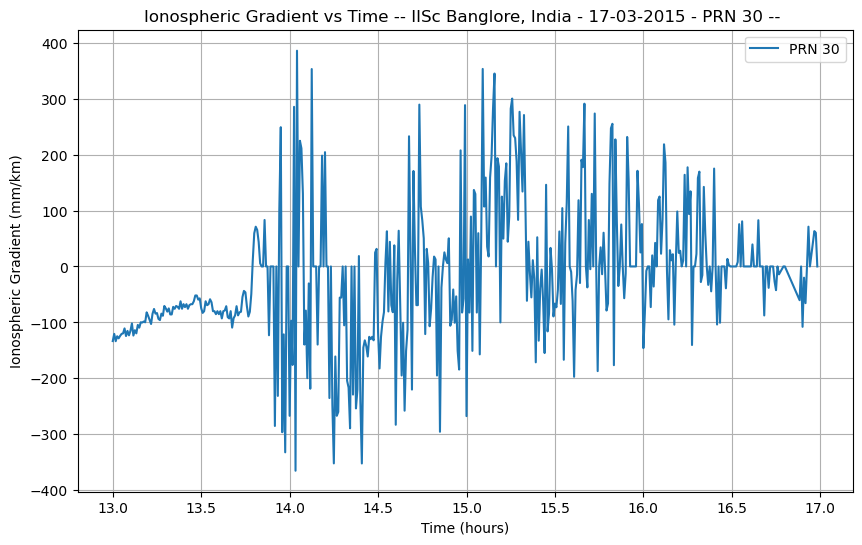

Plots saved for each PRN.


In [39]:

gradient_df = filtered_df

unique_prns = gradient_df["PRN"].unique()

prn_data = gradient_df[gradient_df["PRN"] == 30]

plt.figure(figsize=(10, 6))
plt.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label=f"PRN 30")
plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title(f"Ionospheric Gradient vs Time -- IISc Banglore, India - 17-03-2015 - PRN 30 -- ")
plt.grid(True)
plt.legend()
plt.show()

print("Plots saved for each PRN.")
